# Heart Disease - Logistic Regression

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Heart Disease data

heart_disease_df1 = ml.get_data_of_disease(driver, 'Congestive_Heart_Failure')
heart_disease_df2 = ml.get_data_of_disease(driver, 'Coronary_Heart_Disease')
heart_disease_df3 = ml.get_data_of_disease(driver, 'Stroke')
heart_disease_df4 = ml.get_data_of_disease(driver, 'Heart_Attack')

In [5]:
heart_disease_df = heart_disease_df1.merge(heart_disease_df2[['Respondent_ID','Coronary_Heart_Disease']], 
                                           on='Respondent_ID', how='inner')
heart_disease_df = heart_disease_df.merge(heart_disease_df3[['Respondent_ID','Stroke']], 
                                           on='Respondent_ID', how='inner')
heart_disease_df = heart_disease_df.merge(heart_disease_df4[['Respondent_ID','Heart_Attack']], 
                                           on='Respondent_ID', how='inner')

In [7]:
heart_disease_df['Heart Disease'] = heart_disease_df[['Congestive_Heart_Failure', 'Coronary_Heart_Disease', 
                                                      'Stroke', 'Heart_Attack']].any(axis=1).astype(float)
heart_disease_df.drop(columns=['Congestive_Heart_Failure', 'Coronary_Heart_Disease', 
                                                      'Stroke', 'Heart_Attack'], inplace=True)
heart_disease_df

,Unnamed: 0,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Heart Disease
0,0,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0.0
1,1,93708,0,66,23.7,116.0,1.218750,0.192,0.127,NaN,...,109.00,22.0,13.2,58.32,2.870,247.0,32.0,30.1,0.655,0.0
2,2,93709,0,75,38.9,72.8,1.121212,0.009,0.017,28.561,...,129.00,31.0,15.4,NaN,NaN,NaN,21.0,46.5,NaN,1.0
3,3,93711,1,56,21.3,165.0,1.290323,0.173,0.079,31.115,...,40.60,19.0,14.7,31.68,4.086,139.0,16.0,34.8,0.542,0.0
4,4,93713,1,67,23.5,63.5,2.047619,0.028,0.028,18.344,...,238.00,26.0,14.2,NaN,NaN,123.0,27.0,28.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,5517,102950,1,64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5518,5518,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0.0
5519,5519,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0.0
5520,5520,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0.0


### Training

In [8]:
log_reg = ml.LogisticRegression()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df, label = 'Heart Disease',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

log_reg.fit(X_train, y_train)

# Accuracy scores

y_pred = log_reg.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, log_reg.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.8929137423590673
Testing Accuracy:  0.8885869565217391


## Feature Selection

### Correlation Analysis

In [9]:
log_reg_test = ml.LogisticRegression()

In [10]:
pos_corr, neg_corr = ml.get_correlated_features(heart_disease_df,'Heart Disease',pos=0.0,neg=-0.0)

corr_features = list(pos_corr.keys()[1:]) + list(neg_corr.keys())
corr_features[:30]

['Age',
 'Blood Urea Nitrogen [mg/dL]',
 'Creatinine [mg/dL]',
 'Glycohemoglobin [%]',
 'Osmolality [mmol/Kg]',
 'Red cell distribution width [%]',
 'Alkaline Phosphatase [IU/L]',
 'Retinol [umol/L]',
 'Insulin [pmol/L]',
 'Fasting Glucose [mmol/L]',
 'Lactate Dehydrogenase [IU/L]',
 'Uric Acid [mg/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Potassium [mmol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Blood lead [umol/L]',
 'Monocyte [%]',
 'Gender',
 'Segmented neutrophils [%]',
 'C-Reactive Protein [mg/L]',
 'Transferrin receptor [nmol/L]',
 'Mean cell volume [fL]',
 'Hydroxycotinine [ng/mL]',
 'Basophils [%]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Total Bilirubin [mg/dL]',
 'Blood cadmium [nmol/L]',
 'BMI',
 'Eosinophils [%]',
 'Ferritin [ng/mL]']

In [11]:
ml.evaluate_feature_set(corr_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.890

Test Accuracy: 0.885

Precision: 0.579

Recall: 0.085

F1-Score: 0.148


### SelectFromModel

In [12]:
sfm_features = ml.select_from_model_features(log_reg_test,X,y)
sfm_features

['Gender',
 'Age',
 'Blood Urea Nitrogen [mg/dL]',
 'Cis-beta-carotene [umol/L]',
 'Lutein and zeaxanthin [umol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Non_HDL Ratio',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'Red cell distribution width [%]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Retinyl stearate [umol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Calcium [mg/dL]',
 'Total Cholesterol [mmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Trans-beta-carotene [umol/L]',
 'Triglyceride_HDL Ratio',
 'Albumin [g/dL]',
 'Alkaline Phosphatase [IU/L]',
 'Ferritin [ng/mL]',
 'Lactate Dehydrogenase [IU/L]',
 'Triglyceride [mmol/L]']

In [13]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.890

Test Accuracy: 0.885

Precision: 0.538

Recall: 0.162

F1-Score: 0.249


### SelectKBest

In [14]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Age',
 'Blood Urea Nitrogen [mg/dL]',
 'Creatinine [mg/dL]',
 'Glycohemoglobin [%]',
 'Osmolality [mmol/Kg]',
 'Red cell distribution width [%]',
 'Alpha-crypotoxanthin [umol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Trans-lycopene [umol/L]',
 'Retinol [umol/L]',
 'Total Lycopene [umol/L]',
 'Total Cholesterol [mmol/L]',
 'Platelet count [1000 cells/uL]',
 'Platelet_WBC Ratio',
 'Lymphocyte [%]',
 'Uric Acid [mg/dL]',
 'Lactate Dehydrogenase [IU/L]',
 'Albumin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Non_HDL Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Potassium [mmol/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Gender',
 'Total Iron Binding Capacity [umol/L]',
 'RBC count [million cells/uL]',
 'Insulin [pmol/L]',
 'Blood lead [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Monocyte [%]']

In [15]:
ml.evaluate_feature_set(k_best_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.890

Test Accuracy: 0.884

Precision: 0.525

Recall: 0.123

F1-Score: 0.199


### Recursive Feature Elimination (RFE) 

In [16]:
rfe_features = ml.select_rfe_features(log_reg_test,X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Neutrophil_Lymphocyte Ratio',
 'Transferrin receptor [nmol/L]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Red cell distribution width [%]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Retinyl stearate [umol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Calcium [mg/dL]',
 'Total Cholesterol [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Total Iron Binding Capacity [umol/L]',
 'Trans-beta-carotene [umol/L]',
 'Triglyceride_HDL Ratio',
 'Albumin [g/dL]',
 'Alkaline Phosphatase [IU/L]',
 'Chloride [mmol/L]',
 'Ferritin [ng/mL]',
 'Insulin [pmol/L]',
 'Transferrin Saturation [%]',
 'Lutein and zeaxanthin [umol/L]',
 'Gamma-tocopherol [umol/L]',
 'Triglyceride [mmol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Age',
 'Cis-beta-carotene [umol/L]',
 'BMI',
 'Alpha-carotene [umol/L]']

In [17]:
ml.evaluate_feature_set(rfe_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.890

Test Accuracy: 0.884

Precision: 0.529

Recall: 0.138

F1-Score: 0.220


### Lasso Regularization

In [18]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Age',
 'Platelet count [1000 cells/uL]',
 'Trans-beta-carotene [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Gender',
 'Lutein and zeaxanthin [umol/L]',
 'Retinol [umol/L]',
 'Ferritin [ng/mL]',
 'Alkaline Phosphatase [IU/L]',
 'Cis-beta-carotene [umol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'Total Cholesterol [mmol/L]',
 'Transferrin receptor [nmol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Direct HDL-Cholesterol [mmol/L]',
 'Triglyceride_HDL Ratio',
 'Chloride [mmol/L]',
 'Sodium [mmol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Blood Urea Nitrogen [mg/dL]',
 'Total Calcium [mg/dL]',
 'Trans-lycopene [umol/L]',
 'Insulin [pmol/L]',
 'Gamma-tocopherol [umol/L]',
 'Total Bilirubin [mg/dL]',
 'Blood cadmium [nmol/L]',
 'Beta-cryptoxanthin [umol/L]']

In [19]:
ml.evaluate_feature_set(l1_selected_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.889

Test Accuracy: 0.882

Precision: 0.494

Recall: 0.150

F1-Score: 0.230


### Relief F

In [20]:
relieff_features = ml.relief_feature_select(30,X,y)

In [21]:
relieff_features[:30]

['Age',
 'Blood Urea Nitrogen [mg/dL]',
 'Total Cholesterol [mmol/L]',
 'Nucleated RBCs',
 'Non_HDL Ratio',
 'Unnamed: 0',
 'RBC count [million cells/uL]',
 'Hemoglobin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Hematocrit [%]',
 'Glycohemoglobin [%]',
 'Osmolality [mmol/Kg]',
 'Red cell distribution width [%]',
 'Lymphocyte [%]',
 'Globulin [g/dL]',
 'Segmented neutrophils [%]',
 'Creatinine [mg/dL]',
 'Transferrin Saturation [%]',
 'Sodium [mmol/L]',
 'A/G Ratio',
 'Total Protein [g/dL]',
 'Trans-lycopene [umol/L]',
 'Total Lycopene [umol/L]',
 'Chloride [mmol/L]',
 'Uric Acid [mg/dL]',
 'Mean cell volume [fL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'UIBC [umol/L]',
 'Albumin [g/dL]',
 'Mean cell hemoglobin [pg]']

In [22]:
ml.evaluate_feature_set(relieff_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.885

Test Accuracy: 0.879

Precision: 0.434

Recall: 0.088

F1-Score: 0.147


### Optimal no. of features

In [23]:
final_features = list(l1_selected_features) 

Finding optimal no. of features..: 100%|████████| 86/86 [00:37<00:00,  2.27it/s]



Maximum f1 = 0.2498 for 41 features


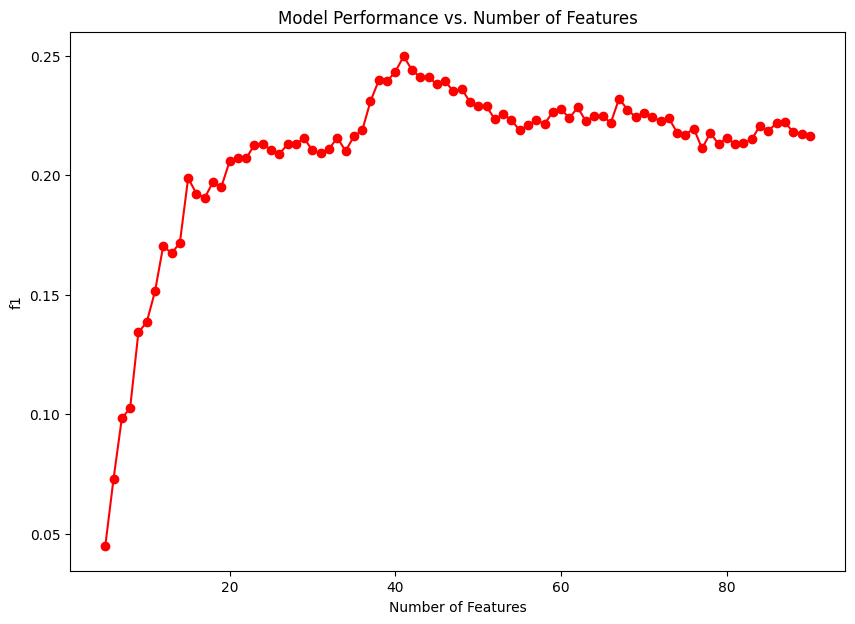

In [25]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='f1')

Finding optimal no. of features..: 100%|████████| 86/86 [00:42<00:00,  2.03it/s]



Maximum recall = 0.1658 for 41 features


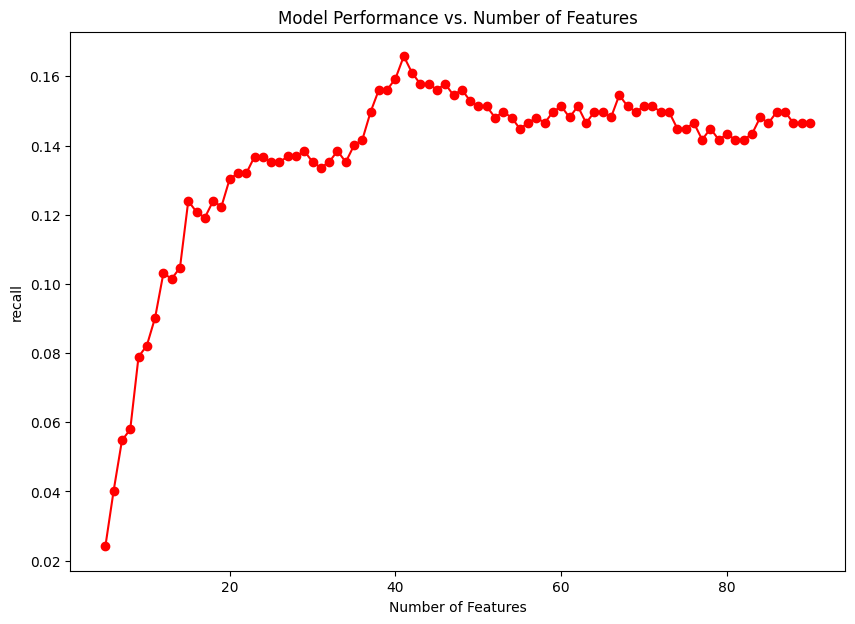

In [26]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='recall')

In [27]:
num_features = 41

selected = final_features[:num_features]
selected.append('Heart Disease')

heart_disease_df = heart_disease_df[selected]

In [29]:
# Save feature set

feature_dir = "../Models/Heart Disease/Feature Sets"
if not ml.os.path.exists(feature_dir):
    ml.os.makedirs(feature_dir)

with open('../Models/Heart Disease/Feature Sets/Logistic Regression Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [30]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df, label = 'Heart Disease',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [31]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.892

Test Accuracy: 0.886

Precision: 0.553

Recall: 0.162

F1-Score: 0.250


### Mode Imputation

In [32]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df, label = 'Heart Disease',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [33]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.890

Test Accuracy: 0.885

Precision: 0.537

Recall: 0.165

F1-Score: 0.253


### k-NN Imputation

In [34]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df, label = 'Heart Disease',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [35]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.892

Test Accuracy: 0.886

Precision: 0.547

Recall: 0.181

F1-Score: 0.272


### Multiple Imputation by Chained Equations (MICE)

In [36]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df, label = 'Heart Disease',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [37]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.891

Test Accuracy: 0.885

Precision: 0.529

Recall: 0.173

F1-Score: 0.261


### Median Imputation

In [38]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df, label = 'Heart Disease',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [39]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.892

Test Accuracy: 0.887

Precision: 0.562

Recall: 0.192

F1-Score: 0.287


### Mean Imputation

In [40]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df, label = 'Heart Disease',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [41]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.892

Test Accuracy: 0.886

Precision: 0.548

Recall: 0.177

F1-Score: 0.267


### Dropping Null Values

In [42]:
# Drop null values
heart_disease_df_na = heart_disease_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = heart_disease_df_na, label = 'Heart Disease',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [43]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.901

Test Accuracy: 0.900

Precision: 0.600

Recall: 0.205

F1-Score: 0.306


## Oversampling and Undersampling

### Random Oversampling

In [44]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

log_reg.fit(X_ros, y_ros)

ml.evaluate_model_metrics(log_reg,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.797

Test Accuracy: 0.777

Precision: 0.305

Recall: 0.836

F1-Score: 0.447


### SMOTE (Synthetic Minority Over-sampling Technique)

In [45]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

log_reg.fit(X_smote, y_smote)

ml.evaluate_model_metrics(log_reg,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.823

Test Accuracy: 0.798

Precision: 0.326

Recall: 0.822

F1-Score: 0.467


### Random Undersampling

In [46]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

log_reg.fit(X_rus, y_rus)

ml.evaluate_model_metrics(log_reg,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.770

Test Accuracy: 0.752

Precision: 0.266

Recall: 0.740

F1-Score: 0.391


### Tomek Links

In [47]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

log_reg.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(log_reg,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.902

Test Accuracy: 0.903

Precision: 0.621

Recall: 0.247

F1-Score: 0.353


### SMOTE + Tomek Links

In [48]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

log_reg.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(log_reg,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.823

Test Accuracy: 0.798

Precision: 0.326

Recall: 0.822

F1-Score: 0.467


In [49]:
# Smote + Tomek provides better results

X_train, y_train = X_smote_tomek, y_smote_tomek

## Hyperparameter Optimization 

### Grid Search

In [50]:
# Hyperparameters
param_grid = {
    
    'penalty': ['l1', 'l2','None'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg','saga','lbfgs'],
    'max_iter': [100,200,300],
    'class_weight': [None, 'balanced'],
    'warm_start': [False, True],
    
}

In [51]:
grid_best_params, log_reg_grid = ml.grid_search_optimize(log_reg, param_grid, X_train, 
                                                                y_train, cv=10,scoring='f1')

In [52]:
grid_best_params

{'C': 1,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga',
 'warm_start': False}

In [53]:
ml.evaluate_model_metrics(log_reg_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.820

Test Accuracy: 0.795

Precision: 0.323

Recall: 0.822

F1-Score: 0.463


### Random Search

In [54]:
rand_best_params, log_reg_rand = ml.random_search_optimize(log_reg,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [55]:
rand_best_params

{'warm_start': True,
 'solver': 'saga',
 'penalty': 'l2',
 'max_iter': 100,
 'class_weight': None,
 'C': 1}

In [56]:
ml.evaluate_model_metrics(log_reg_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.823

Test Accuracy: 0.798

Precision: 0.326

Recall: 0.822

F1-Score: 0.467


### Optuna

In [57]:
def objective(trial):
    
    # Hyperparameter search space
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'saga', 'lbfgs',
                                                  'liblinear','sag'])
    if (penalty == "l1" and solver not in ["liblinear", "saga"]) or (penalty == "elasticnet" and solver not in ["saga"]) or penalty=='none' and solver in ['liblinear']:
        return 0
    max_iter = trial.suggest_int('max_iter', 100, 300, 500)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    warm_start = trial.suggest_categorical('warm_start', [False, True])
    fit_intercept = trial.suggest_categorical('fit_intercept', [False, True])

    model = ml.LogisticRegression(
        penalty=penalty, C=C, solver=solver, max_iter=max_iter,
        class_weight=class_weight, warm_start=warm_start, fit_intercept=fit_intercept
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    f1 = ml.f1_score(y_test, y_pred)

    return f1

In [58]:
best_trial , log_reg_opt = ml.optuna_optimize(objective, ml.LogisticRegression, n_trials=150)

In [59]:
best_trial

{'penalty': 'l1',
 'C': 0.06364769178825445,
 'solver': 'saga',
 'max_iter': 100,
 'class_weight': None,
 'warm_start': False,
 'fit_intercept': True}

In [60]:
log_reg_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(log_reg_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.813

Test Accuracy: 0.774

Precision: 0.296

Recall: 0.795

F1-Score: 0.431


## Evaluation on Test Set


Train Accuracy: 0.823

Test Accuracy: 0.778

Precision: 0.298

Recall: 0.747

F1-Score: 0.426

Confusion Matrix:

[[472 132]
 [ 19  56]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.96      0.78      0.86       604
     Class 1       0.30      0.75      0.43        75

    accuracy                           0.78       679
   macro avg       0.63      0.76      0.64       679
weighted avg       0.89      0.78      0.81       679


ROC-AUC Curve:


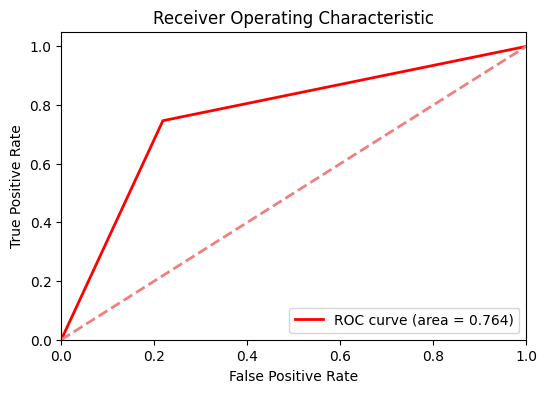

In [61]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(log_reg, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [62]:
ml.k_cross_validate(log_reg,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91176471 0.9        0.88823529 0.91764706 0.88823529 0.9
 0.88235294 0.89349112 0.89940828 0.88757396]

Mean accuracy score:  0.8968708666898711

Standard deviation:  0.010664283757116656


In [63]:
ml.k_cross_validate(log_reg_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.90588235 0.9        0.88235294 0.90588235 0.89411765 0.9
 0.88235294 0.89349112 0.89940828 0.88757396]

Mean accuracy score:  0.8951061608075183

Standard deviation:  0.008272054930359138


In [64]:
ml.k_cross_validate(log_reg_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91176471 0.9        0.88235294 0.90588235 0.89411765 0.9
 0.88235294 0.89349112 0.89940828 0.8816568 ]

Mean accuracy score:  0.8951026801253045

Standard deviation:  0.009847846521987065


In [65]:
ml.k_cross_validate(log_reg_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.9        0.91764706 0.89411765 0.87647059 0.87647059 0.89411765
 0.87647059 0.89349112 0.89940828 0.8816568 ]

Mean accuracy score:  0.890985033066481

Standard deviation:  0.012680751582585525


### Stratified K-fold

In [66]:
ml.stratified_k_cross_validate(log_reg,X,y,n_splits=10)


Average Accuracy: 0.8945214061956144

Average Precision: 0.5791666666666667

Average Recall: 0.19678362573099414

Average F1-Score: 0.2891492505495504


In [67]:
ml.stratified_k_cross_validate(log_reg_grid,X,y,n_splits=10)


Average Accuracy: 0.8957048381482771

Average Precision: 0.6095238095238095

Average Recall: 0.18625730994152048

Average F1-Score: 0.27819052811256706


In [68]:
ml.stratified_k_cross_validate(log_reg_rand,X,y,n_splits=10)


Average Accuracy: 0.8951096414897319

Average Precision: 0.5827380952380953

Average Recall: 0.19678362573099414

Average F1-Score: 0.28884525181076903


In [69]:
ml.stratified_k_cross_validate(log_reg_opt,X,y,n_splits=10)


Average Accuracy: 0.8921615036547162

Average Precision: 0.59

Average Recall: 0.09561403508771929

Average F1-Score: 0.16059369768294252


### Save Model

In [70]:
final_log_reg_estimator = log_reg

In [71]:
# Saving the model

ml.save_model(final_log_reg_estimator, "../Models/Heart Disease/Logistic_Regression.pkl")

Saved Model


## Prediction

In [72]:
# Predicting on perturbed values
sc = ml.np.random.rand()

ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[0], y_test.iloc[0], sc)

Instance:
 [ 0.          1.07890186  0.48792811  0.90959197  0.32063336 -0.37403447
  0.58941655 -0.19845492 -1.50474043  0.78101069  2.17342975 -0.80883986
 -0.27017971 -0.08784474  0.54026555 -0.45647686 -0.01231973  0.81616246
 -0.32546612 -1.98178936  0.1803974   1.58589823  0.48294764  1.07223729
 -0.27675235 -0.56239439 -1.52413855  1.17422041  0.429352   -0.087414
 -0.27758316  0.4042275   0.20730496 -0.02067272  0.18519537  1.16547023
  0.17601617  0.61724201  0.23642538  0.67218464  1.15505875]

Expected Class:  0.0

 Modified Instance:
 [ 0.          0.83774122  0.37560895  0.93333333  0.23783494 -0.51010684
  0.58707232 -0.53981122 -1.62015006  1.01264101  1.91131458 -0.81511528
 -0.20970434  0.02343934  0.46327276 -0.43442425  0.01545544  0.96900584
 -0.38443244 -2.0227814   0.22923453  1.46486967  0.25986448  1.31390489
 -0.31332451 -0.69400395 -1.30909419  1.19695398  0.50252885 -0.16896059
 -0.46881087  0.25707653  0.44308121 -0.22643684  0.17548113  1.25585186
 -0.14067

In [77]:
ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[5], y_test.iloc[5], sc)

Instance:
 [ 1.          1.53740876 -1.05646336 -0.78647846 -0.74804904 -0.590358
 -1.13129473 -0.34191513  2.20112666 -0.5214785  -0.00660297  0.77053781
 -0.20451866 -0.38333494 -1.65008911 -0.30396421 -1.19955022 -0.40000612
 -0.21769998  0.22013872 -0.19563835 -0.62151721  1.94146384 -0.96032747
 -1.61846922  2.42852401 -0.16340411 -1.09992388 -0.32430392 -0.67718935
  2.06204631  2.28746839 -0.19699632 -0.26537288  1.40093191 -0.15466994
  0.17601617 -1.47899748 -1.50158456 -0.08117926  2.57653523]

Expected Class:  0.0

 Modified Instance:
 [ 1.00000000e+00  1.49371476e+00 -1.21389986e+00 -6.18703432e-01
 -6.75435580e-01 -5.39810182e-01 -1.15994209e+00 -1.54541689e-01
  2.52077426e+00 -5.39468735e-01  7.58060339e-04  7.01273006e-01
 -8.32231009e-02 -6.18582485e-01 -1.54887760e+00 -2.90626093e-01
 -8.88650399e-01 -4.68500687e-01 -2.37188489e-01  2.86372391e-01
 -2.47757853e-01 -4.14343429e-01  2.10944289e+00 -5.93287368e-01
 -1.72871937e+00  2.18340741e+00 -4.00154141e-02 -1.07966

In [79]:
ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[98], y_test.iloc[98], sc)

Instance:
 [ 1.          1.65203548  0.33033714 -0.14364683  1.04928044 -0.34612176
  1.71147082 -0.80017879  0.07222429 -0.04784607  0.98309131  4.93435168
  1.40567918 -0.68233318 -0.43938674  4.65718262 -1.2109659   1.7593136
 -0.77149872  0.58712673  0.93246889 -0.58354107  0.96911971 -0.08922829
 -0.92549458  0.01127161 -1.17363962 -0.72089983  1.15097754  0.67214516
  0.18116772  1.08904237 -1.81420143 -0.84354813 -0.42267291 -1.7631166
  0.17601617  0.31777923 -1.09481628 -2.71026551  0.23527986]

Expected Class:  1.0

 Modified Instance:
 [ 1.          1.80447376  0.29031034 -0.12407124  1.03426704 -0.34548144
  1.70409363 -0.78748294  0.19936456 -0.02432192  0.83028068  4.69221295
  1.38685904 -0.59186997 -0.71200712  4.7101988  -1.04444804  1.70672948
 -0.93184757  0.6150792   0.97232907 -0.42127175  0.82824836 -0.15789539
 -0.74478612 -0.05108768 -1.2288071  -0.95326004  1.07701922  0.82687758
 -0.00803643  1.27070023 -1.79360197 -0.90279677 -0.59723162 -2.01690353
 -0.03676